### Imports

In [18]:
from sklearn.model_selection import train_test_split
from logreg import *
import random
random.seed(123)

### Load dataset

In [19]:
X, y = generate_dataset()

#or
# df = pd.read_csv('./data/yourdata.csv')
# X = np.asmatrix(df.drop(columns='target'))
# y = np.asarray(df['target'])
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

### Fit model


In [21]:
ccd_model = LogRegCCD()
results, best_lambda = ccd_model.optimize_lambda(X_train, y_train, X_valid, y_valid)
ccd_model.fit(X_train, y_train, ccd_model.best_lambda)

### Predict

In [23]:
ccd_probs = ccd_model.predict_proba(X_valid)
ccd_preds = (ccd_probs >= 0.5).astype(int)

### Evaluate

In [24]:
ccd_f1 = f1_score(y_valid, ccd_preds)
print(f"LogRegCCD F1 Score: {ccd_f1:.4f}")

LogRegCCD F1 Score: 0.7055


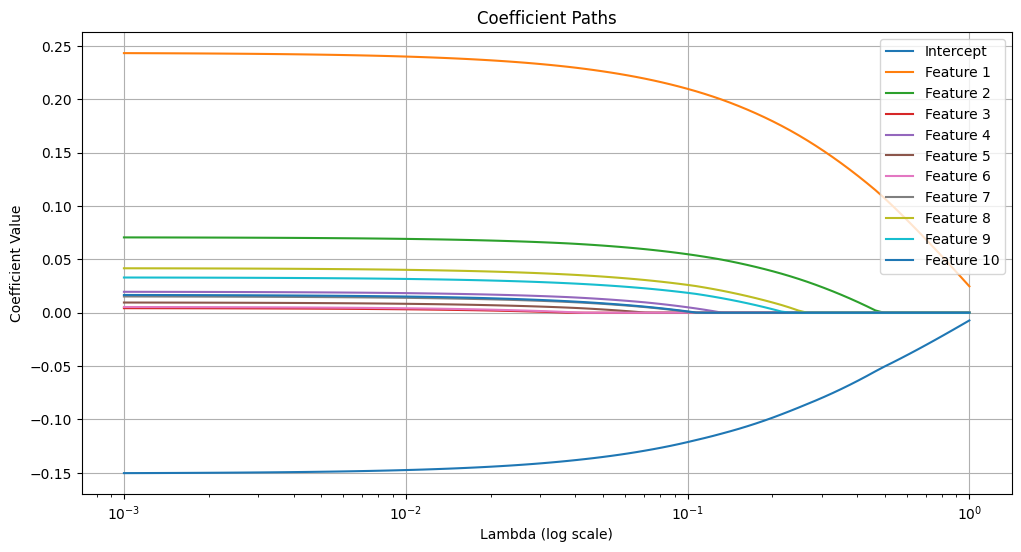

In [25]:
ccd_model.plot_coefficients(results)

<Figure size 1000x600 with 0 Axes>

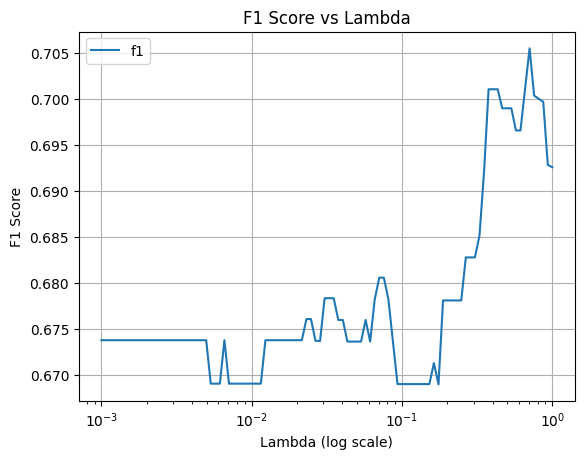

In [26]:
ccd_model.plot(results, measure="f1")